In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import scipy.stats as stats

%matplotlib inline
pd.set_option('display.max_columns', None)

In [7]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [9]:
# 1.1
crosstab_df = pd.crosstab(index=df['category'], columns='isBestSeller')
crosstab_df                  

col_0,isBestSeller
category,
3D Printers,248
3D Printing & Scanning,4067
Abrasive & Finishing Products,250
Action Cameras,1697
Adapters,254
...,...
Wind Instruments,250
Window Treatments,239
Women,17772


In [35]:
df.category.unique()

array(['Hi-Fi Speakers', 'CD, Disc & Tape Players', 'Wearable Technology',
       'Light Bulbs', 'Bathroom Lighting',
       'Heating, Cooling & Air Quality', 'Coffee & Espresso Machines',
       'Lab & Scientific Products', 'Smart Speakers',
       'Motorbike Clothing', 'Motorbike Accessories',
       'Motorbike Batteries', 'Motorbike Boots & Luggage',
       'Motorbike Chassis', 'Handmade Home & Kitchen Products',
       'Hardware', 'Storage & Home Organisation',
       'Fireplaces, Stoves & Accessories', 'PC Gaming Accessories',
       'USB Gadgets', 'Blank Media Cases & Wallets', 'Car & Motorbike',
       'Boys', 'Sports & Outdoors', 'Microphones', 'String Instruments',
       'Karaoke Equipment', 'PA & Stage',
       'General Music-Making Accessories', 'Wind Instruments',
       'Handmade Gifts', 'Fragrances', 'Calendars & Personal Organisers',
       'Furniture & Lighting', 'Computer Printers', 'Ski Goggles',
       'Snowboards', 'Skiing Poles', 'Downhill Ski Boots',
       'Hiki

In [11]:
crosstab_df.sort_values('isBestSeller', ascending=False)

col_0,isBestSeller
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978
...,...
Motorbike Chassis,107
Plugs,107
Alexa Built-In Devices,107


In [13]:
# 1.2
chi2_stats, chi2_pvalue, _, _ = chi2_contingency(crosstab_df)

In [15]:
chi2_pvalue

1.0

In [ ]:
# No hay suficiente evidencia para confirmar que existe una relacción significativa entre ambas variables

In [19]:
crosstab_df

col_0,isBestSeller
category,
3D Printers,248
3D Printing & Scanning,4067
Abrasive & Finishing Products,250
Action Cameras,1697
Adapters,254
...,...
Wind Instruments,250
Window Treatments,239
Women,17772


In [27]:
n = df.shape[0]  # Número total de observaciones
min_dim = min(crosstab_df.shape) - 1  # Tamaño mínimo de dimensión de la tabla menos 1

# Fórmula de Cramér's V
cramers_v_value = np.sqrt(chi2_stats / (n * min_dim))

ZeroDivisionError: float division by zero

In [ ]:
# No se puede calculat el Cramers porque tan solo hay una columna

<Figure size 1400x800 with 0 Axes>

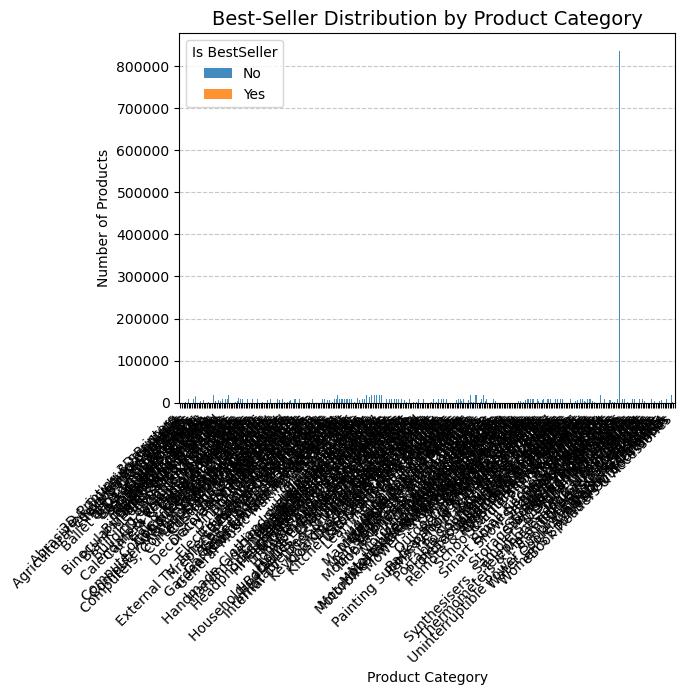

In [29]:
# 1.3
best_seller_distribution = df.groupby(['category', 'isBestSeller']).size().unstack()

# 1. Plot the stacked bar chart
plt.figure(figsize=(14, 8))
best_seller_distribution.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], alpha=0.85)

# 2. Customize the plot
plt.title("Best-Seller Distribution by Product Category", fontsize=14)
plt.xlabel("Product Category")
plt.ylabel("Number of Products")
plt.legend(title="Is BestSeller", labels=["No", "Yes"])
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

In [37]:
# 2.0
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Determining outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
print(f"Number of rows after removing outliers: {len(df_no_outliers)}")

# Percentage of data removed
percentage_removed = 100 * (1 - len(df_no_outliers) / len(df))
print(f"Percentage of outliers removed: {percentage_removed:.2f}%")

Number of rows after removing outliers: 2115963
Percentage of outliers removed: 13.41%


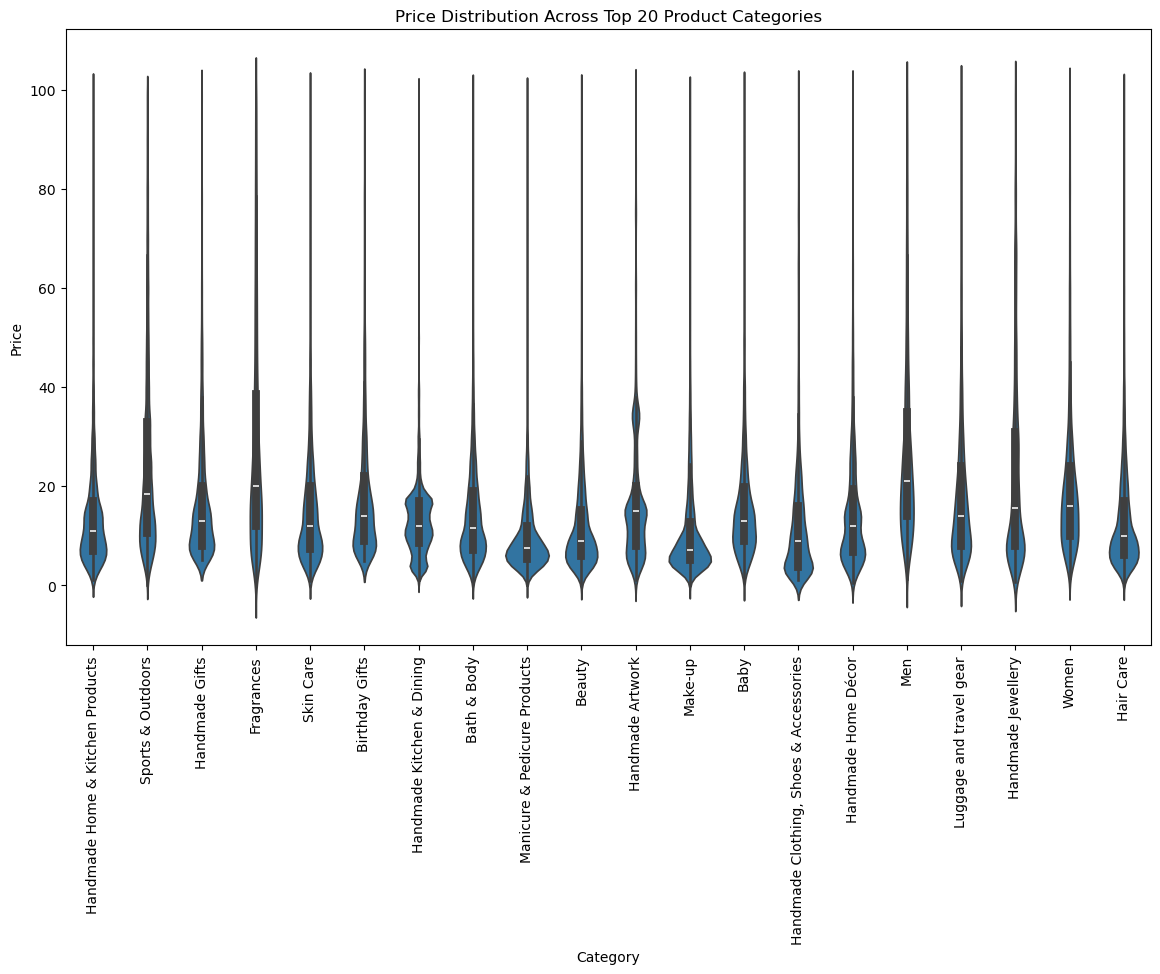

In [47]:
# 2.1
top_categories = df_no_outliers['category'].value_counts().head(20).index
filtered_df = df_no_outliers[df_no_outliers['category'].isin(top_categories)]

# Violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(data=filtered_df, x='category', y='price')
plt.xticks(rotation=90)
plt.title("Price Distribution Across Top 20 Product Categories")
plt.xlabel("Category")
plt.ylabel("Price")
plt.show()

In [ ]:
# Las categorias con la mediana más elevada son Men y Fragances puesto que tienen una concentración más heterogénea

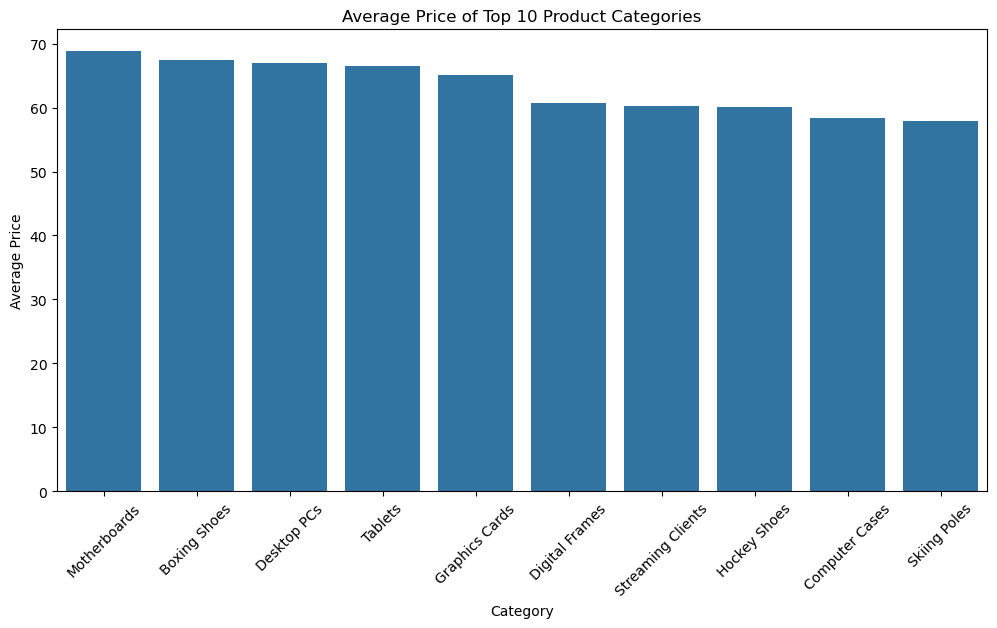

In [59]:
# 2.2
avg_price_per_category = df_no_outliers.groupby('category')['price'].mean()

# Top 10 categories by average price
top_avg_price_categories = avg_price_per_category.nlargest(10)

# Bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_avg_price_categories.index, y=top_avg_price_categories.values)
plt.xticks(rotation=45)
plt.title("Average Price of Top 10 Product Categories")
plt.xlabel("Category")
plt.ylabel("Average Price")
plt.show()

In [55]:
top_avg_price_categories.head(1)
# Categoría con el precio medio más alto

category
Motherboards    68.772432
Name: price, dtype: float64

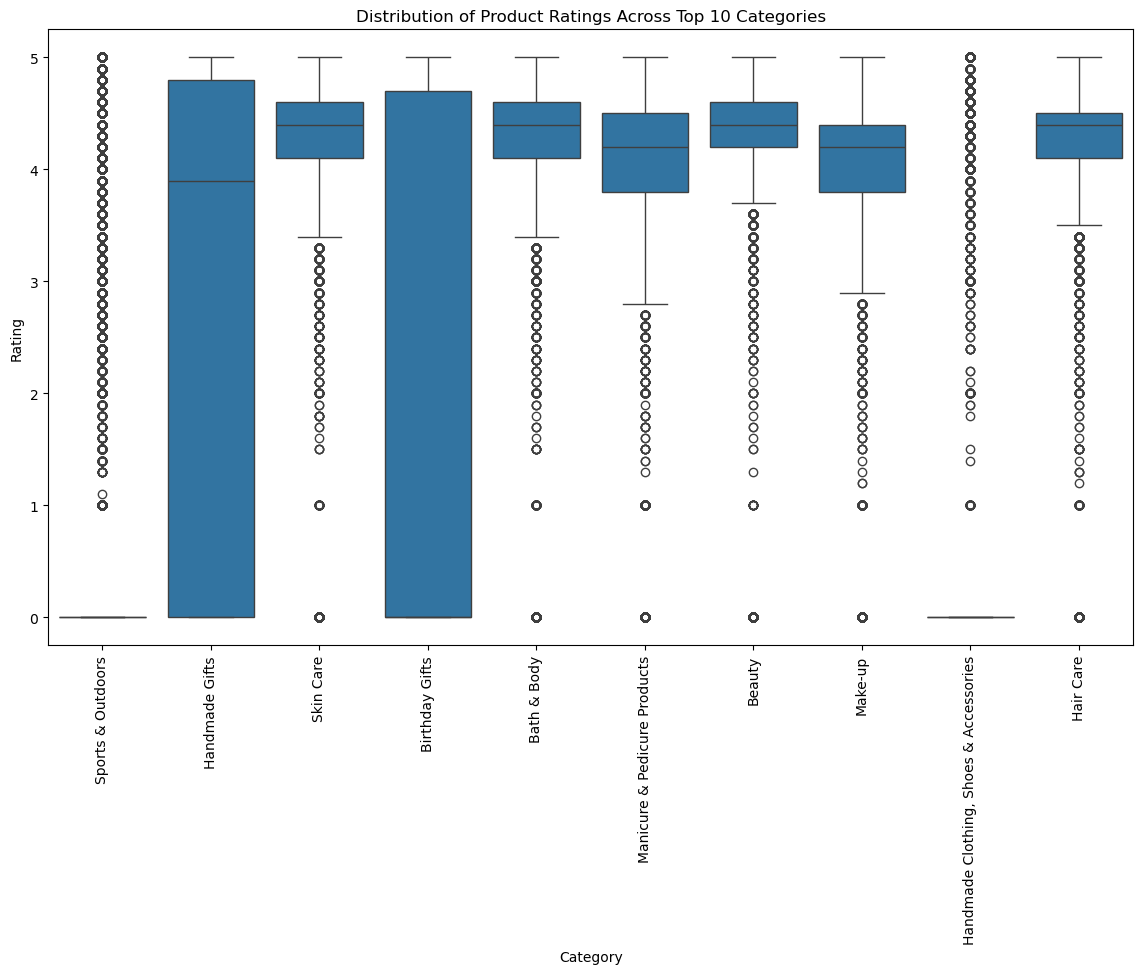

In [57]:
# 2.2
top_rating_categories = df_no_outliers['category'].value_counts().head(10).index
filtered_rating_df = df_no_outliers[df_no_outliers['category'].isin(top_rating_categories)]

# Box plot for product ratings
plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered_rating_df, x='category', y='stars')
plt.xticks(rotation=90)
plt.title("Distribution of Product Ratings Across Top 10 Categories")
plt.xlabel("Category")
plt.ylabel("Rating")
plt.show()

In [61]:
# 3.1
df['price'].corr(df['stars'])

-0.1249067326214861

In [ ]:
# There is a small negative relationship between both variables

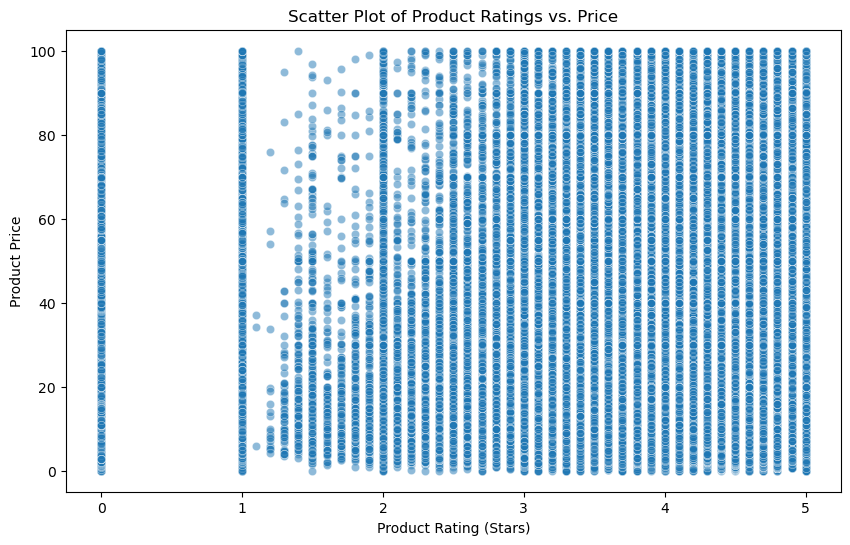

In [63]:
# 3.2
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x='stars', y='price', alpha=0.5)
plt.title("Scatter Plot of Product Ratings vs. Price")
plt.xlabel("Product Rating (Stars)")
plt.ylabel("Product Price")
plt.show()

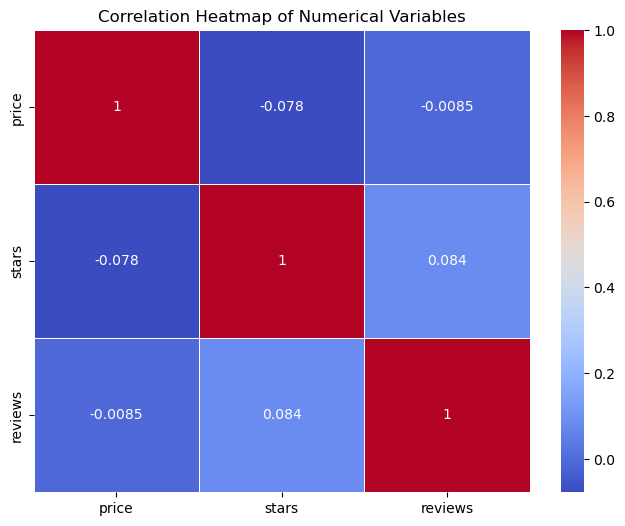

In [65]:
# There are prices of all kinds for each star score
numerical_cols = df_no_outliers[['price', 'stars', 'reviews']]

# Correlation matrix
corr_matrix = numerical_cols.corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

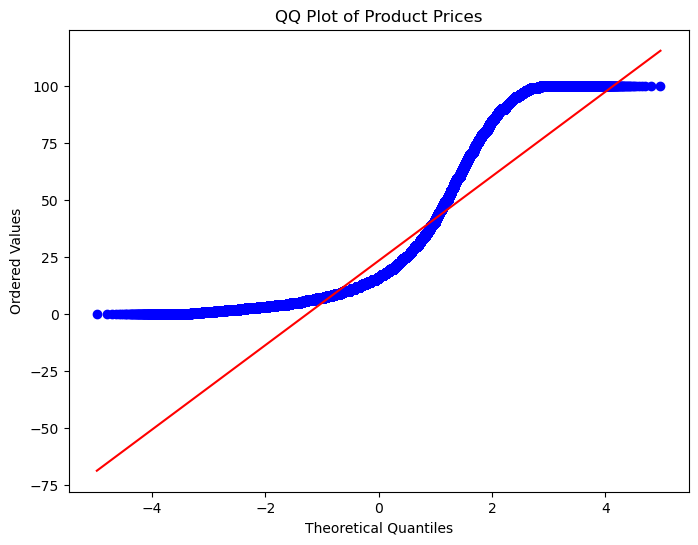

In [71]:
plt.figure(figsize=(8, 6))
stats.probplot(df_no_outliers['price'], dist="norm", plot=plt)
plt.title("QQ Plot of Product Prices")
plt.ylabel("Ordered Values")
plt.xlabel("Theoretical Quantiles")
plt.show()

In [ ]:
# Existe una distribución sesgada para el precio